In [1]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

%matplotlib inline

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 16
get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

This quick notebook compares various ways of applying map and filter functions: using the builtin map() and filter(), list comprehensions, and standard for loops. We will also try different ways of applying our function.

We'll profile each methods to see which wins!

# map

### map() + lambda

In [2]:
def map_lambda():
    return map(lambda x: x%3, range(1000000))

t_map_lambda = %timeit -o -r 10 -n 1 map_lambda()

1 loops, best of 10: 299 ms per loop


### map() + function

In [3]:
def modd(x):
    return x%3

def map_def():
    return map(modd, range(1000000))

t_map_def = %timeit -o -r 10 -n 1 map_def()

1 loops, best of 10: 292 ms per loop


### list comprehension

In [4]:
def map_list():
    return [x%3 for x in range(1000000)]

t_map_list = %timeit -o -r 10 -n 1 map_list()

1 loops, best of 10: 180 ms per loop


### list comprehension + function

In [5]:
def map_list_def():
    return [modd(x) for x in range(1000000)]

t_map_list_def = %timeit -o -r 10 -n 1 map_list_def()

1 loops, best of 10: 325 ms per loop


### for loop

In [6]:
def map_for_loop():
    l = range(1000000)
    for i, x in enumerate(l):
        l[i] = x % 3
    return l

t_map_for_loop = %timeit -o -r 10 -n 1 map_for_loop()

1 loops, best of 10: 222 ms per loop


### for loop + function

In [7]:
def map_for_loop_def():
    l = range(1000000)
    for i, x in enumerate(l):
        l[i] = modd(x)
    return l

t_map_for_loop_def = %timeit -o -r 10 -n 1 map_for_loop_def()

1 loops, best of 10: 379 ms per loop


## map results

In [8]:
t_map_def.__dict__

{'_precision': 3,
 'all_runs': [0.302807092666626,
  0.2922041416168213,
  0.29352784156799316,
  0.29230713844299316,
  0.2922701835632324,
  0.30483007431030273,
  0.3020949363708496,
  0.2993950843811035,
  0.30718302726745605,
  0.3001410961151123],
 'best': 0.2922041416168213,
 'compile_time': 0.00017400000000034055,
 'loops': 1,
 'repeat': 10,
 'worst': 0.30718302726745605}

In [24]:
map_results = {
    'map()\n+ lambda': [np.mean(t_map_lambda.all_runs), np.std(t_map_lambda.all_runs)],
    'map()\n+ def': [np.mean(t_map_def.all_runs), np.std(t_map_def.all_runs)],
    'list comp': [np.mean(t_map_list.all_runs), np.std(t_map_list.all_runs)],
    'list comp\n+ def': [np.mean(t_map_list_def.all_runs), np.std(t_map_list_def.all_runs)],
    'for loop': [np.mean(t_map_for_loop.all_runs), np.std(t_map_for_loop.all_runs)],
    'for loop\n+ def': [np.mean(t_map_for_loop_def.all_runs), np.std(t_map_for_loop_def.all_runs)]
}

map_results_ordered = OrderedDict(sorted(map_results.items(), key=lambda t: t[1][0]))

In [26]:
map_results_ordered

OrderedDict([('list comp', [0.18466522693634033, 0.0034427056949027628]),
             ('for loop', [0.22716825008392333, 0.0028967256560394209]),
             ('map()\n+ def', [0.29867606163024901, 0.0054004273250981196]),
             ('map()\n+ lambda', [0.32964487075805665, 0.045779251204950112]),
             ('list comp\n+ def',
              [0.33139867782592775, 0.0044990352685738222]),
             ('for loop\n+ def', [0.3862429618835449, 0.005593066203723799])])

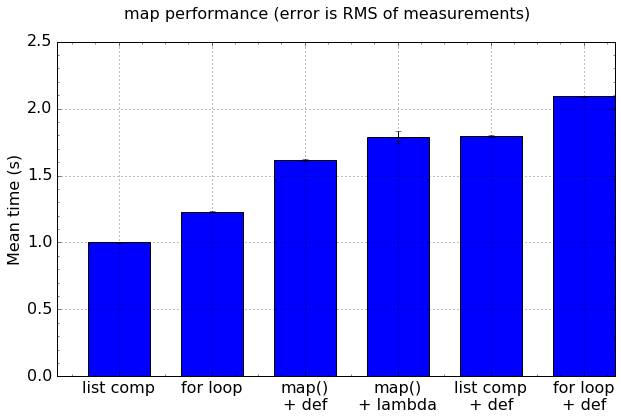

In [46]:
plt.bar(left=[i*3 for i in range(len(map_results))], 
        width=2, 
        height=[x[0] for x in map_results_ordered.values()], 
        yerr=[x[1] for x in map_results_ordered.values()], 
        tick_label=map_results_ordered.keys(), 
        align='center',
        ecolor='black')
plt.ylabel('Mean time (s)')
plt.suptitle('map performance (error is RMS of measurements)')
plt.minorticks_on()
plt.grid()

In [49]:
map_results_relative_ordered = map_results_ordered.copy()
fastest = map_results_relative_ordered.values()[0][0]
for k, v in map_results_relative_ordered.iteritems():
    map_results_relative_ordered[k][0] = v[0] / fastest
    map_results_relative_ordered[k][1] = v[1] / fastest

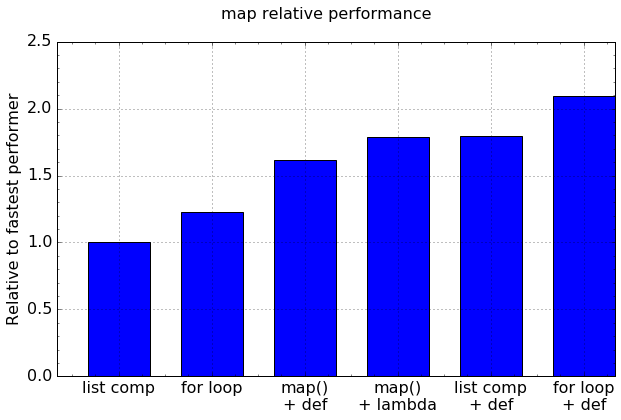

In [51]:
plt.bar(left=[i*3 for i in range(len(map_results))], 
        width=2, 
        height=[x[0] for x in map_results_relative_ordered.values()], 
        tick_label=map_results_relative_ordered.keys(), 
#         yerr=[x[1] for x in map_results_relative_ordered.values()], 
        align='center',
        ecolor='black')
plt.ylabel('Relative to fastest performer')
plt.suptitle('map relative performance')
plt.minorticks_on()
plt.grid()

# filter 

### filter() + lambda

In [11]:
def filter_lambda():
    return filter(lambda x: x in [1,2,3,4,5], range(1000000))

t_filter_lambda = %timeit -o -r 10 -n 1 filter_lambda()

1 loops, best of 10: 365 ms per loop


### filter() + function

In [12]:
def check(i):
    return i in [1,2,3,4,5]

def filter_def():
    return filter(check, range(1000000))

t_filter_def = %timeit -o -r 10 -n 1 filter_def()

1 loops, best of 10: 367 ms per loop


### list comprehension

In [13]:
def filter_list():
    return [x for x in range(1000000) if x in [1,2,3,4,5]]

t_filter_list = %timeit -o -r 10 -n 1 filter_list()

1 loops, best of 10: 247 ms per loop


### list comprehension + function

In [14]:
def filter_list_def():
    return [x for x in range(1000000) if check(x)]

t_filter_list_def = %timeit -o -r 10 -n 1 filter_list_def()

1 loops, best of 10: 410 ms per loop


## filter results

In [15]:
t_filter_lambda.__dict__

{'_precision': 3,
 'all_runs': [0.39859604835510254,
  0.3648250102996826,
  0.37784790992736816,
  0.3665950298309326,
  0.38240909576416016,
  0.37334680557250977,
  0.37583303451538086,
  0.36533093452453613,
  0.37225914001464844,
  0.3753478527069092],
 'best': 0.3648250102996826,
 'compile_time': 0.00016700000000113846,
 'loops': 1,
 'repeat': 10,
 'worst': 0.39859604835510254}

In [16]:
filter_results = {
    'filter()\n+ lambda': [np.mean(t_filter_lambda.all_runs), np.std(t_filter_lambda.all_runs)],
    'filter()\n+ def': [np.mean(t_filter_def.all_runs), np.std(t_filter_def.all_runs)],
    'list comp': [np.mean(t_filter_list.all_runs), np.std(t_filter_list.all_runs)],
    'list comp\n+ def': [np.mean(t_filter_list_def.all_runs), np.std(t_filter_list_def.all_runs)],
}

filter_results_ordered = OrderedDict(sorted(filter_results.items(), key=lambda t: t[1][0]))

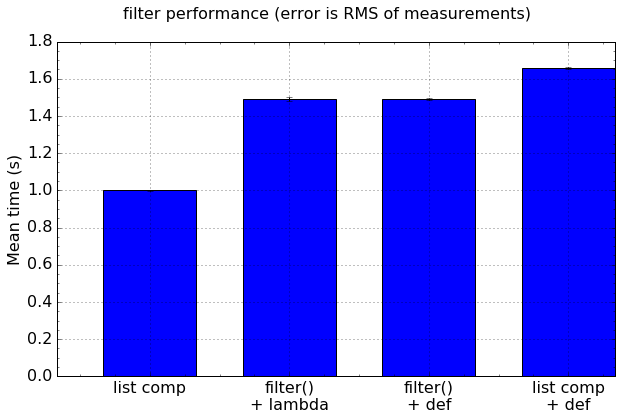

In [47]:
plt.bar(left=[i*3 for i in range(len(filter_results))], 
        width=2, 
        height=[x[0] for x in filter_results_ordered.values()], 
        yerr=[x[1] for x in filter_results_ordered.values()], 
        tick_label=filter_results_ordered.keys(), 
        align='center',
        ecolor='black')
plt.ylabel('Mean time (s)')
plt.suptitle('filter performance (error is RMS of measurements)')
plt.minorticks_on()
plt.grid()

In [52]:
filter_results_relative_ordered = filter_results_ordered.copy()
fastest = filter_results_relative_ordered.values()[0][0]
for k, v in filter_results_relative_ordered.iteritems():
    filter_results_relative_ordered[k][0] = v[0] / fastest
    filter_results_relative_ordered[k][1] = v[1] / fastest

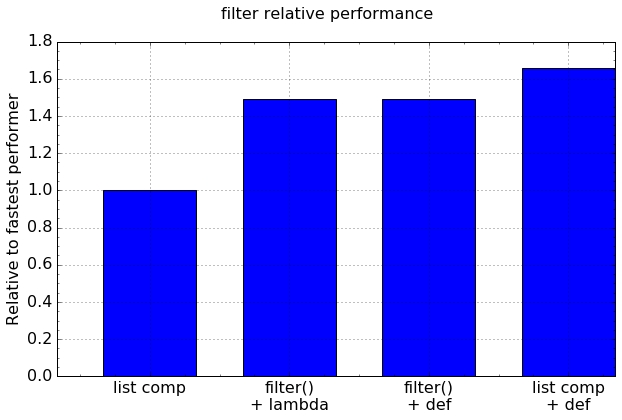

In [54]:
plt.bar(left=[i*3 for i in range(len(filter_results))], 
        width=2, 
        height=[x[0] for x in filter_results_relative_ordered.values()], 
        tick_label=filter_results_relative_ordered.keys(), 
#         yerr=[x[1] for x in filter_results_relative_ordered.values()], 
        align='center',
        ecolor='black')
plt.ylabel('Relative to fastest performer')
plt.suptitle('filter relative performance')
plt.minorticks_on()
plt.grid()